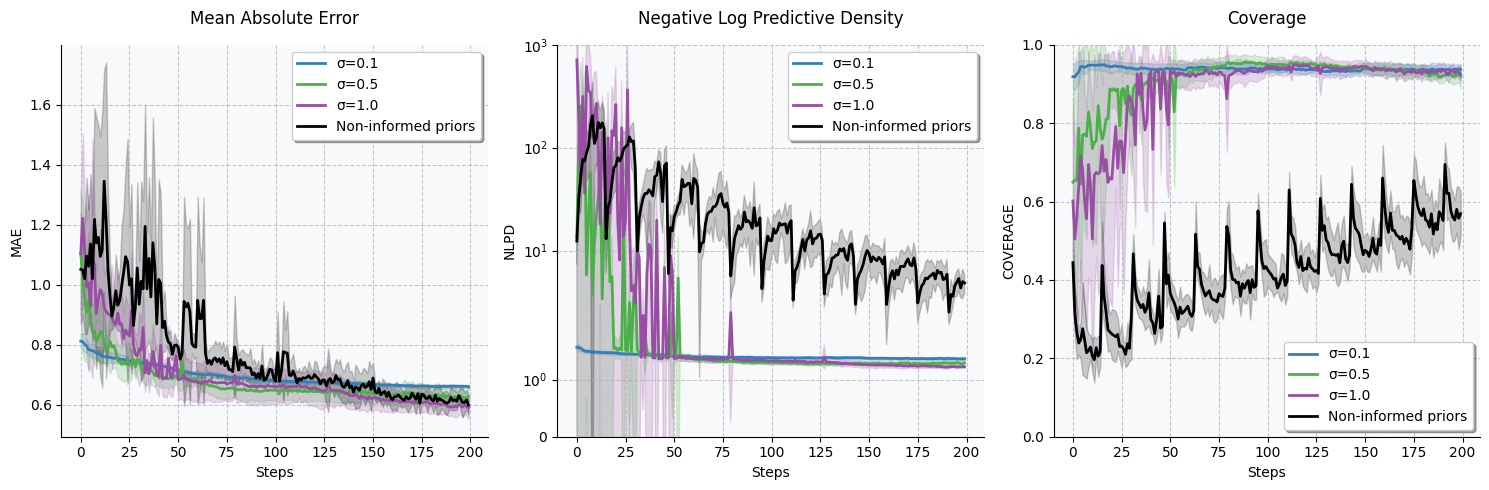

In [23]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# Configuration
COLORS = {
    0.1: '#377EB8',    # blue
    0.5: '#4DAF4A',    # green
    1.0: '#984EA3'     # purple
}

METRICS = ['mae', 'nlpd', 'coverage']
TITLES = ['Mean Absolute Error', 'Negative Log Predictive Density', 'Coverage']

def load_results(file_path):
    with open(file_path, 'rb') as f:
        return pickle.load(f)

def compute_metric(results, metric_name):
    runs = results['runs']
    metric_data = np.array([runs[seed][metric_name] for seed in runs.keys()])
    return np.mean(metric_data, axis=0), np.std(metric_data, axis=0)

def plot_metric(ax, mean_values, std_values, label, color):
    steps = range(len(mean_values))
    ax.plot(steps, mean_values, label=label, color=color, linewidth=2)
    ax.fill_between(steps, mean_values - std_values, mean_values + std_values, 
                   alpha=0.2, color=color)

def style_axis(ax):
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(direction='out')
    ax.set_facecolor('#f8f9fa')
    ax.legend(frameon=True, fancybox=True, shadow=True)

# Create figure
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Load and process results for different sigma values
results_dir = Path('results/pbnn321688')
result_files = list(results_dir.glob('*.pkl'))

# Plot metrics for different sigma values
for sigma in COLORS:
    for file in result_files:
        results = load_results(file)
        if results['config']['priors_sigma'] == sigma:
            for ax, metric in zip(axes, METRICS):
                mean_values, std_values = compute_metric(results, metric)
                plot_metric(ax, mean_values, std_values, f'σ={sigma}', COLORS[sigma])
            break

# Add non-informed priors results
non_informed_path = '../bandgap/results/pbnn321688/bandgap_probdense2-dense3-dense4_steps200_epochs2000_lr0.005_20241215_055240.pkl'
results = load_results(non_informed_path)

for ax, metric in zip(axes, METRICS):
    mean_values, std_values = compute_metric(results, metric)
    plot_metric(ax, mean_values, std_values, 'Non-informed priors', 'k')
    style_axis(ax)

# Customize each subplot
for ax, title, metric in zip(axes, TITLES, METRICS):
    ax.set_title(title, pad=15)
    ax.set_xlabel('Steps')
    ax.set_ylabel(metric.upper())
    
    if metric == 'nlpd':
        ax.set_yscale('symlog')
        ax.set_ylim(0, 1000)
    elif metric == 'coverage':
        ax.set_ylim(0, 1)

plt.tight_layout()
plt.show()